In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

Attaining Dataset via wget

In [3]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'
!wget $data

--2024-07-05 22:37:03--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: 'data.csv.5'

     0K .......... .......... .......... .......... ..........  3% 2.80M 0s
    50K .......... .......... .......... .......... ..........  6% 9.62M 0s
   100K .......... .......... .......... .......... .......... 10% 4.00M 0s
   150K .......... .......... .......... .......... .......... 13% 19.6M 0s
   200K .......... .......... .......... .......... .......... 17% 17.8M 0s
   250K .......... .......... .......... .......... .......... 20% 6.32M 0s
   300K .......... .......... .......... .......... .......... 24% 14.4M 0s
   350K 

Read Dataset

In [4]:
df = pd.read_csv(data)

In [5]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


Cleaning Up Data

In [6]:
df.columns = df.columns.str.lower().str.replace(' ','_')
# won't work -> df.columns = df.columns.str.lower().replace(' ','_')

In [7]:
# df.head()
df.number_of_doors[df['number_of_doors']==None].count()

0

In [8]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [9]:
string_columns = list(df.dtypes[df.dtypes == 'object'].index)
string_columns = df.dtypes[df.dtypes=='object']
string_columns = df.dtypes[df.dtypes=='object'].index
string_columns = list(df.dtypes[df.dtypes=='object'].index)
# string_columns = list(df.dtypes[df.dtypes=='object']) this will just return a list of 'data types i.e. dtype('O')


print(string_columns)

['make', 'model', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style']


In [10]:
df.head(20)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,31200
6,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,26,17,3916,44100
7,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,39300
8,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,36900
9,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,27,18,3916,37200


In [11]:
df.columns
for col in df.columns:
    print(col)
    print(df[col].head())
    print()

make
0    BMW
1    BMW
2    BMW
3    BMW
4    BMW
Name: make, dtype: object

model
0    1 Series M
1      1 Series
2      1 Series
3      1 Series
4      1 Series
Name: model, dtype: object

year
0    2011
1    2011
2    2011
3    2011
4    2011
Name: year, dtype: int64

engine_fuel_type
0    premium unleaded (required)
1    premium unleaded (required)
2    premium unleaded (required)
3    premium unleaded (required)
4    premium unleaded (required)
Name: engine_fuel_type, dtype: object

engine_hp
0    335.0
1    300.0
2    300.0
3    230.0
4    230.0
Name: engine_hp, dtype: float64

engine_cylinders
0    6.0
1    6.0
2    6.0
3    6.0
4    6.0
Name: engine_cylinders, dtype: float64

transmission_type
0    MANUAL
1    MANUAL
2    MANUAL
3    MANUAL
4    MANUAL
Name: transmission_type, dtype: object

driven_wheels
0    rear wheel drive
1    rear wheel drive
2    rear wheel drive
3    rear wheel drive
4    rear wheel drive
Name: driven_wheels, dtype: object

number_of_doors
0    2.0
1   

In [12]:
# print(df.columns)
for col in df.columns:
    print(df[col].unique()[:4])
    print(df[col].unique())
    # print(df[col][:4])
    print()

['BMW' 'Audi' 'FIAT' 'Mercedes-Benz']
['BMW' 'Audi' 'FIAT' 'Mercedes-Benz' 'Chrysler' 'Nissan' 'Volvo' 'Mazda'
 'Mitsubishi' 'Ferrari' 'Alfa Romeo' 'Toyota' 'McLaren' 'Maybach'
 'Pontiac' 'Porsche' 'Saab' 'GMC' 'Hyundai' 'Plymouth' 'Honda'
 'Oldsmobile' 'Suzuki' 'Ford' 'Cadillac' 'Kia' 'Bentley' 'Chevrolet'
 'Dodge' 'Lamborghini' 'Lincoln' 'Subaru' 'Volkswagen' 'Spyker' 'Buick'
 'Acura' 'Rolls-Royce' 'Maserati' 'Lexus' 'Aston Martin' 'Land Rover'
 'Lotus' 'Infiniti' 'Scion' 'Genesis' 'HUMMER' 'Tesla' 'Bugatti']

['1 Series M' '1 Series' '100' '124 Spider']
['1 Series M' '1 Series' '100' '124 Spider' '190-Class' '2 Series' '200'
 '200SX' '240SX' '240' '2' '3 Series Gran Turismo' '3 Series' '300-Class'
 '3000GT' '300' '300M' '300ZX' '323' '350-Class' '350Z' '360' '370Z' '3'
 '4 Series Gran Coupe' '4 Series' '400-Class' '420-Class' '456M'
 '458 Italia' '4C' '4Runner' '5 Series Gran Turismo' '5 Series'
 '500-Class' '500e' '500' '500L' '500X' '550' '560-Class' '570S' '575M'
 '57' '599' '5' 

Visualizing Data

0    46135
1    40650
2    36350
3    29450
4    34500
Name: msrp, dtype: int64


c:\tools\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


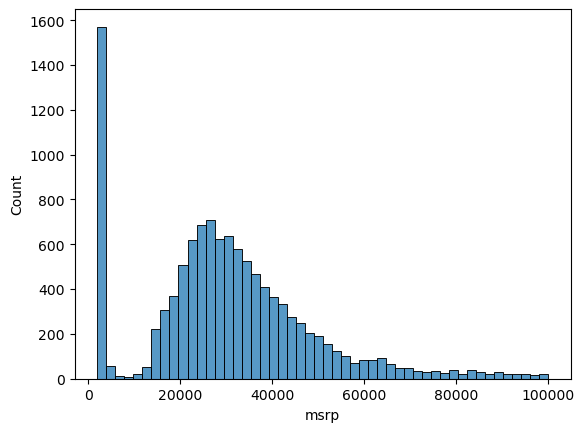

In [13]:
# Visualize the dataset!
# sns.histplot(df.msrp, bins=50)
# sns.histplot(df[df.msrp < 100000], bins=50)
sns.histplot(df.msrp[df.msrp < 100000], bins=50)
print(df.msrp.head())

In [14]:
print(df.msrp[df.msrp < 100000]) # this will output subsetted msrp values only
print(df[df.msrp < 100000]) # this will output entire rows of dataframes tied 

0        46135
1        40650
2        36350
3        29450
4        34500
         ...  
11909    46120
11910    56670
11911    50620
11912    50920
11913    28995
Name: msrp, Length: 11276, dtype: int64
          make       model  year                engine_fuel_type  engine_hp  \
0          BMW  1 Series M  2011     premium unleaded (required)      335.0   
1          BMW    1 Series  2011     premium unleaded (required)      300.0   
2          BMW    1 Series  2011     premium unleaded (required)      300.0   
3          BMW    1 Series  2011     premium unleaded (required)      230.0   
4          BMW    1 Series  2011     premium unleaded (required)      230.0   
...        ...         ...   ...                             ...        ...   
11909    Acura         ZDX  2012     premium unleaded (required)      300.0   
11910    Acura         ZDX  2012     premium unleaded (required)      300.0   
11911    Acura         ZDX  2012     premium unleaded (required)      300.0   
11912

Applying Logarithmic Distribution (get a more compact view)

count    11914.000000
mean        10.113729
std          1.105703
min          7.601402
25%          9.952325
50%         10.308819
75%         10.650939
max         14.541078
Name: msrp, dtype: float64


c:\tools\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='msrp', ylabel='Count'>

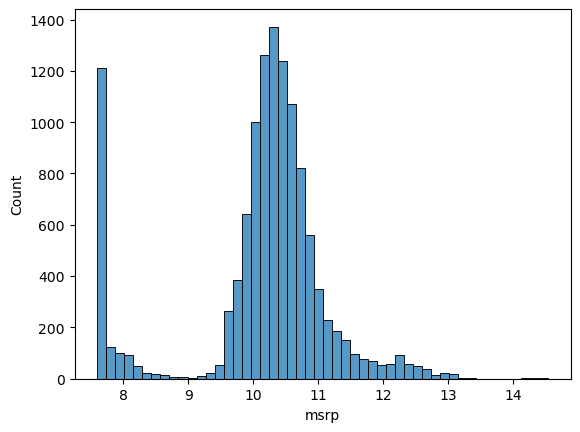

In [15]:
# np.log([1,10,1000,10000])
# np.log([1+1,10+1,1000+1,10000+1])
price_logs = np.log1p(df.msrp)
print(price_logs.describe())
sns.histplot(price_logs,bins=50)

Missing Values

In [16]:
df.isnull()
# won't work -> will only count non-missing values df.isnull().count()
df.isnull().sum() # will sum up the missing values of dataframe

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

Setting up Validation Framework

In [22]:
n = len(df)

n_val = int(n*0.2)
# n_val = n*0.2 -> will return decimal form!
n_test = int(n*(0.2))
n_train = int(n - n_val - n_test)

In [23]:
n_val, n_test, n_train

(2382, 2382, 7150)

In [19]:
df.iloc[:11]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,31200
6,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,26,17,3916,44100
7,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,39300
8,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,36900
9,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,27,18,3916,37200


In [40]:
df_train = df.iloc[n_train:]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [38]:
len(df)

11914

In [31]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
7150,Lincoln,Navigator,2015,regular unleaded,365.0,6.0,AUTOMATIC,rear wheel drive,4.0,Luxury,Large,4dr SUV,20,15,61,63645
7151,Lincoln,Navigator,2016,regular unleaded,380.0,6.0,AUTOMATIC,rear wheel drive,4.0,Luxury,Large,4dr SUV,22,16,61,63195
7152,Lincoln,Navigator,2016,regular unleaded,380.0,6.0,AUTOMATIC,four wheel drive,4.0,Luxury,Large,4dr SUV,19,15,61,76650
7153,Lincoln,Navigator,2016,regular unleaded,380.0,6.0,AUTOMATIC,four wheel drive,4.0,Luxury,Large,4dr SUV,19,15,61,69135
7154,Lincoln,Navigator,2016,regular unleaded,380.0,6.0,AUTOMATIC,rear wheel drive,4.0,Luxury,Large,4dr SUV,20,15,61,65560


In [41]:
df_val.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
7150,Lincoln,Navigator,2015,regular unleaded,365.0,6.0,AUTOMATIC,rear wheel drive,4.0,Luxury,Large,4dr SUV,20,15,61,63645
7151,Lincoln,Navigator,2016,regular unleaded,380.0,6.0,AUTOMATIC,rear wheel drive,4.0,Luxury,Large,4dr SUV,22,16,61,63195
7152,Lincoln,Navigator,2016,regular unleaded,380.0,6.0,AUTOMATIC,four wheel drive,4.0,Luxury,Large,4dr SUV,19,15,61,76650
7153,Lincoln,Navigator,2016,regular unleaded,380.0,6.0,AUTOMATIC,four wheel drive,4.0,Luxury,Large,4dr SUV,19,15,61,69135
7154,Lincoln,Navigator,2016,regular unleaded,380.0,6.0,AUTOMATIC,rear wheel drive,4.0,Luxury,Large,4dr SUV,20,15,61,65560


In [33]:
df_test.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
9532,Chevrolet,Silverado 1500,2015,regular unleaded,355.0,8.0,AUTOMATIC,rear wheel drive,4.0,NaN,Large,Crew Cab Pickup,23,16,1385,47575
9533,Chevrolet,Silverado 1500,2015,flex-fuel (unleaded/E85),285.0,6.0,AUTOMATIC,rear wheel drive,4.0,Flex Fuel,Large,Extended Cab Pickup,24,18,1385,31940
9534,Chevrolet,Silverado 1500,2015,flex-fuel (unleaded/E85),285.0,6.0,AUTOMATIC,rear wheel drive,4.0,Flex Fuel,Large,Crew Cab Pickup,24,18,1385,38335
9535,Chevrolet,Silverado 1500,2015,flex-fuel (unleaded/E85),285.0,6.0,AUTOMATIC,rear wheel drive,4.0,Flex Fuel,Large,Extended Cab Pickup,24,18,1385,35870
9536,Chevrolet,Silverado 1500,2015,flex-fuel (unleaded/E85),285.0,6.0,AUTOMATIC,rear wheel drive,2.0,Flex Fuel,Large,Regular Cab Pickup,24,18,1385,28155
